<a href="https://colab.research.google.com/github/AKAT119/Credit-Card-Fraud-Detection/blob/master/Fraud_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd


In [11]:
df_Azin = pd.read_csv('credit_card_fraud.csv')

In [12]:
df_Azin.head(5)

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0


In [13]:
df_Azin.keys()

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'city', 'state',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
df_Azin.is_fraud.value_counts()


0    337825
1      1782
Name: is_fraud, dtype: int64

In [15]:
df_Azin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [16]:
df_Azin.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [17]:
df_Azin.shape   #339607 rows and  columns 15

(339607, 15)

In [18]:
numeric_columns = df_Azin.select_dtypes(include=['int', 'float'])
numeric_columns = numeric_columns.drop(columns=['is_fraud'])

In [19]:
desc_numeric_columns = numeric_columns.describe()

desc_numeric_columns

,amt,lat,long,city_pop,merch_lat,merch_long
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203


In [20]:

categorical_columns = df_Azin.select_dtypes(include=['object'])
categorical_columns

,trans_date_trans_time,merchant,category,city,state,job,dob,trans_num
0,2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,Orient,WA,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,Malad City,ID,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,Grenada,CA,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,High Rolls Mountain Park,NM,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,Freedom,WY,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3
...,...,...,...,...,...,...,...,...
339602,2020-12-31 23:57:56,Schmidt-Larkin,home,Wales,AK,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014
339603,2020-12-31 23:58:04,"Pouros, Walker and Spence",kids_pets,Greenview,CA,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e
339604,2020-12-31 23:59:07,Reilly and Sons,health_fitness,Luray,MO,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada
339605,2020-12-31 23:59:15,Rau-Robel,kids_pets,Burbank,WA,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408


In [21]:
#checking unique values
for column in categorical_columns:
    unique_values = categorical_columns[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in trans_date_trans_time: ['2019-01-01 00:00:44' '2019-01-01 00:00:51' '2019-01-01 00:07:27' ...
 '2020-12-31 23:59:07' '2020-12-31 23:59:15' '2020-12-31 23:59:24']
Unique values in merchant: ['Heller, Gutmann and Zieme' 'Lind-Buckridge' 'Kiehn Inc' 'Beier-Hyatt'
 'Bruen-Yost' 'Kunze Inc' 'Nitzsche, Kessler and Wol'
 'Kihn, Abernathy and Douglas' 'Ledner-Pfannerstill' 'Stracke-Lemke'
 'Cummerata-Jones' 'Huel-Langworth' 'Ferry, Lynch and Kautze'
 'Little, Gutmann and Lynch' 'Swaniawski, Lowe and Robel'
 'Reichert, Huels and Hoppe' 'Howe Lt' 'Wolf Inc' 'Vandervort-Funk'
 'Schaefer, McGlynn and Bosco' 'Fisher-Schowalte' 'Medhurst PLC'
 'Kerluke Inc' 'Bauch-Rayno' 'Hills-Olson' 'Durgan-Aue' 'Pacocha-Bauch'
 'Reilly, Heaney and Cole' 'Bradtke PLC' 'Zieme, Bode and Dooley'
 'Hills-Witting' 'Bernhard, Grant and Langworth' 'Lockman Lt' 'Harber Inc'
 'Kerluke, Kertzmann and Wiz' 'Johnston, Nikolaus and Maggio'
 'Torp-Labadie' 'Doyle Lt' 'McDermott-Rice' 'Spinka Inc'
 'McGlynn-Jask

In [22]:
#checking the number of unique values in each feature   Rows = 339,607
for column in df_Azin.columns:
    unique_values = df_Azin[column].unique()
    print(f"Unique values in {column}: {len(unique_values)}")

Unique values in trans_date_trans_time: 338504
Unique values in merchant: 693
Unique values in category: 14
Unique values in amt: 32112
Unique values in city: 176
Unique values in state: 13
Unique values in lat: 183
Unique values in long: 183
Unique values in city_pop: 174
Unique values in job: 163
Unique values in dob: 187
Unique values in trans_num: 339607
Unique values in merch_lat: 335608
Unique values in merch_long: 337263
Unique values in is_fraud: 2


In [23]:
#to see and analyze  correlation between features and a target variable
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df_Azin.corr()


<ipython-input-23-ee759ed0d362>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_Azin.corr()


In [24]:
#display
print(correlation_matrix)

                 amt       lat      long  city_pop  merch_lat  merch_long  \
amt         1.000000  0.002817 -0.007017  0.006050   0.002957   -0.006891   
lat         0.002817  1.000000 -0.151364 -0.236336   0.993646   -0.151267   
long       -0.007017 -0.151364  1.000000 -0.066080  -0.150385    0.998960   
city_pop    0.006050 -0.236336 -0.066080  1.000000  -0.235019   -0.066052   
merch_lat   0.002957  0.993646 -0.150385 -0.235019   1.000000   -0.150278   
merch_long -0.006891 -0.151267  0.998960 -0.066052  -0.150278    1.000000   
is_fraud    0.201023  0.009239 -0.004494  0.002338   0.008848   -0.004550   

            is_fraud  
amt         0.201023  
lat         0.009239  
long       -0.004494  
city_pop    0.002338  
merch_lat   0.008848  
merch_long -0.004550  
is_fraud    1.000000  


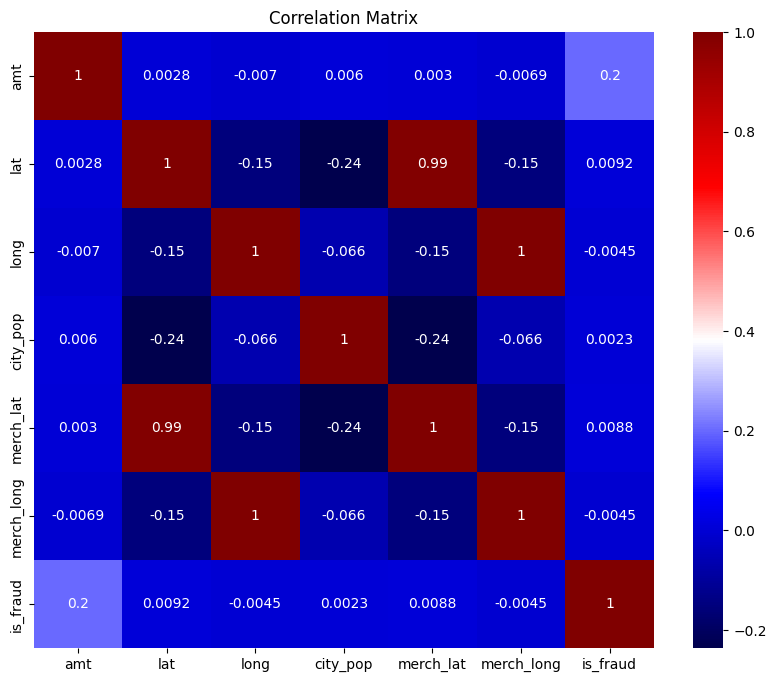

In [25]:
#visualize with the help of haetmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='seismic')  # Create a heatmap with correlation values annotated
plt.title('Correlation Matrix')  # Set the title of the plot
plt.show()  # Show the plot


correlation with Target: The is_fraud row/column shows the correlation of all features with the target variable. None of the features seem to have a particularly strong correlation with fraud, which is common in fraud detection problems because fraudulent behavior can be subtle and not directly related to any single feature.
High Correlation Between Features: There is a very high correlation (close to 1) between lat and merch_lat, as well as between long and merch_long. This suggests that these pairs of features essentially convey the same information, which confirms the redundancy of merchant coordinates if you already have the customer's coordinates

In [26]:
df_Azin.duplicated().sum()

0

In [27]:
for col in df_Azin.columns:                       #there is no duplicated rows in columns
    dup_check = df_Azin.duplicated().sum
    print(dup_check)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
339602    False
339603    False
339604    False
339605    False
339606    False
Length: 339607, dtype: bool>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
339602    False
339603    False
339604    False
339605    False
339606    False
Length: 339607, dtype: bool>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
339602    False
339603    False
339604    False
339605    False
339606    False
Length: 339607, dtype: bool>
<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
339602    False
339603    False
339604   

🗺️ Explore: What types of purchases are most likely to be instances of fraud? Consider both product category and the amount of the transaction.
📊 Visualize: Use a geospatial plot to visualize the fraud rates across different states.
🔎 Analyze: Are older customers significantly more likely to be victims of credit card fraud?



The number of fraud cases: 1782


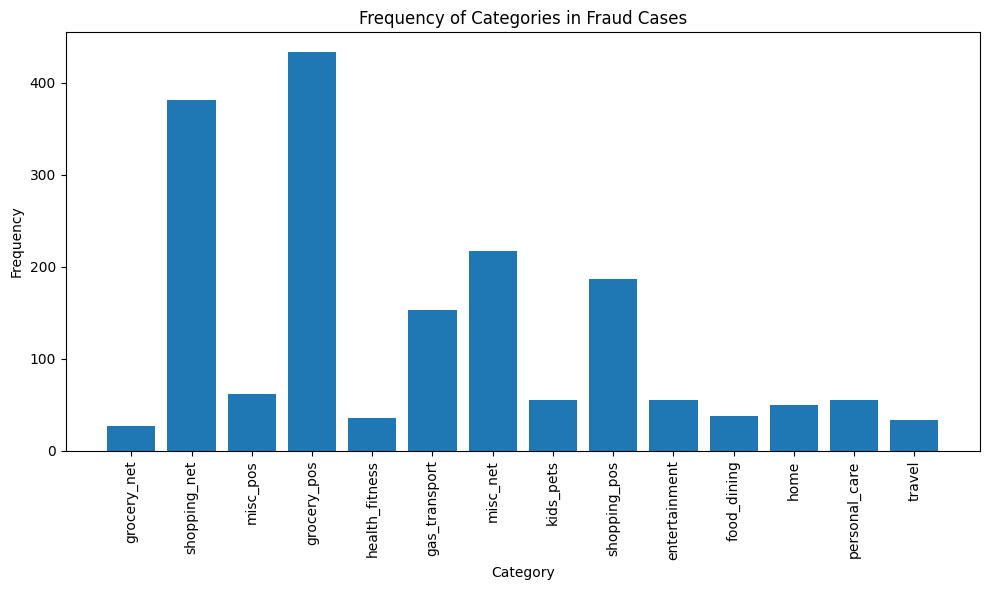

In [28]:


# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# Efficiently count the number of fraud cases
count_fraud_cases = df_Azin['is_fraud'].sum()
print("The number of fraud cases:", count_fraud_cases)

# Extract categories and amounts for fraud cases
fraud_transactions = df_Azin[df_Azin['is_fraud'] == 1]
fraud_categories = fraud_transactions['category'].tolist()
fraud_amounts = fraud_transactions['amt'].tolist()

# Count the occurrences of each category in fraud cases
category_counter = Counter(fraud_categories)

# Visualize the frequency of categories in fraud cases
categories, frequencies = zip(*category_counter.items())  # Unpacking the categories and frequencies

plt.figure(figsize=(10, 6))
plt.bar(categories, frequencies)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Categories in Fraud Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



Therefore the more fruad happened in grocery_pos & shopping_net

In [29]:


# Extract transaction amounts for fraud and non-fraud cases using vectorized operations
fraud_trans_amount = df_Azin[df_Azin['is_fraud'] == 1]['amt'].tolist()
non_fraud_trans_amount = df_Azin[df_Azin['is_fraud'] == 0]['amt'].tolist()

# Print a few sample amounts for fraud and non-fraud cases for demonstration
print("Sample fraud amounts:", fraud_trans_amount[:5])  # Prints first 5 amounts
print("Sample non-fraud amounts:", non_fraud_trans_amount[:5])  # Prints first 5 amounts

# The optimized code efficiently extracts transaction amounts using pandas' capabilities
# and avoids the slower iterrows() loop. The [:5] is used to print a sample of the amounts.


Sample fraud amounts: [14.37, 966.11, 49.61, 295.26, 18.17]
Sample non-fraud amounts: [107.23, 220.11, 96.29, 7.77, 6.85]


In [30]:
import statistics
Mean_of_Fraud_amount_purchaces = statistics.mean(fraud_trans_amount)
print(f"mean of amount of purchaces in fraud case:{Mean_of_Fraud_amount_purchaces}")

Mean_of_non_Fraud_amount_purchaces = statistics.mean(non_fraud_trans_amount)
print(f"mean of amount of purchaces in non fraud case:{Mean_of_non_Fraud_amount_purchaces}")

mean of amount of purchaces in fraud case:518.0654601571268
mean of amount of purchaces in non fraud case:68.21752312587878


<ipython-input-31-bcbd827e6e35>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_trans_amount, shade=True, label="Fraud", color='red')
<ipython-input-31-bcbd827e6e35>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_trans_amount, shade=True, label="Non-Fraud", color='blue')


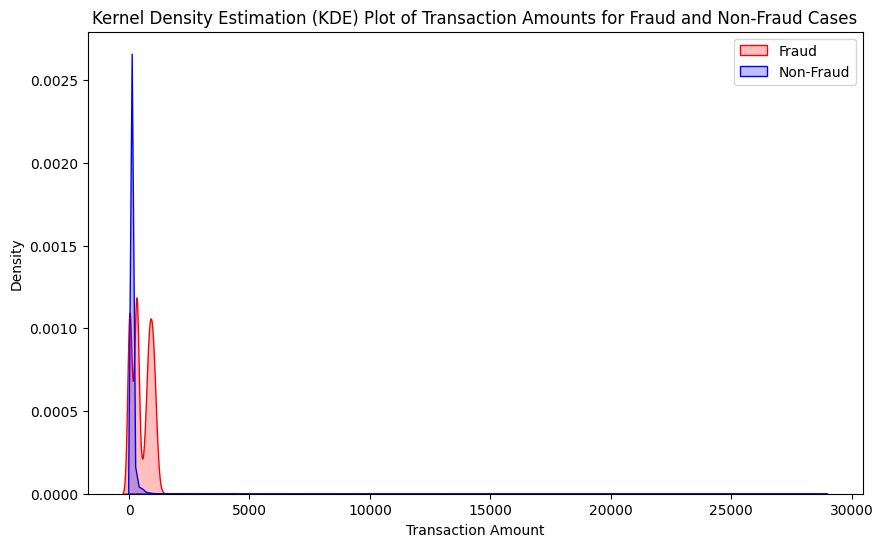

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


# Extract transaction amounts for fraud and non-fraud cases using vectorized operations
fraud_trans_amount = df_Azin[df_Azin['is_fraud'] == 1]['amt']
non_fraud_trans_amount = df_Azin[df_Azin['is_fraud'] == 0]['amt']

# Visualize the distribution of transaction amounts for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
sns.kdeplot(fraud_trans_amount, shade=True, label="Fraud", color='red')
sns.kdeplot(non_fraud_trans_amount, shade=True, label="Non-Fraud", color='blue')
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.title("Kernel Density Estimation (KDE) Plot of Transaction Amounts for Fraud and Non-Fraud Cases")
plt.legend()
plt.show()



Transaction Amounts: The fraud transactions (red) indeed show a wider spread in transaction amounts compared to non-fraudulent transactions (blue), which are more concentrated around lower amounts. This could indicate that fraudulent transactions tend to have more variability in the amount.
Peak Points (Modes): The fraud distribution appears to have multiple peaks (modes), suggesting there might be several typical transaction amounts that are common in fraud cases. This contrasts with the non-fraudulent transactions, which show a single, sharp peak, indicating that legitimate transactions are more uniform in amount.
Density of Transactions: The peak density of non-fraudulent transactions is higher, reflecting that there is a common transaction amount range where most legitimate transactions occur. Fraudulent transactions have a lower peak density, which spreads across a range of amounts.
Higher Transaction Amounts: Towards the higher end of the transaction amounts (the "tail" of the distribution), the fraud cases are more prevalent than non-fraud cases, which is consistent with the notion that fraudsters might attempt higher-value transactions.

In [32]:
import datetime

In [33]:
current_date = datetime.datetime.now()
df_Azin['dob'] = pd.to_datetime(df_Azin['dob'])
df_Azin['age'] = (current_date - df_Azin['dob']).astype('<m8[Y]') #we add a new col to store age for each dob

There is a significant association between age groups and fraud status.


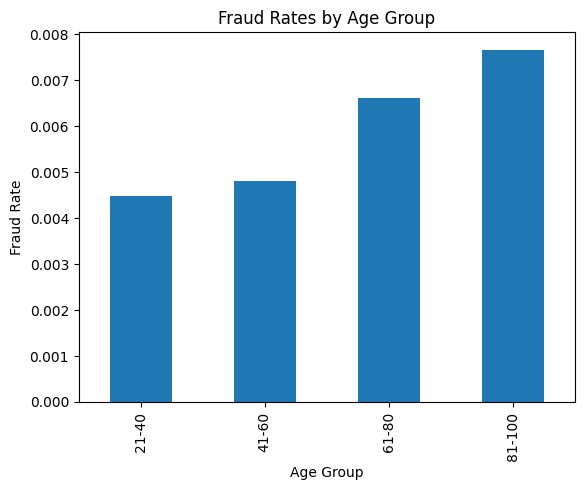

In [34]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Assuming df_Azin is already loaded and 'dob' has been converted to datetime

# Calculate the age of each customer
data_collection_date = pd.Timestamp('2022-12-31')
df_Azin['age'] = (data_collection_date - df_Azin['dob']).dt.days // 365

# Create age groups
df_Azin['age_group'] = pd.cut(df_Azin['age'], bins=[20, 40, 60, 80, 100], labels=['21-40', '41-60', '61-80', '81-100'])

# Create a cross-tabulation
cross_tab = pd.crosstab(df_Azin['age_group'], df_Azin['is_fraud'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(cross_tab)

# Significance level lpha is set to 0.05, representing a 5% significance level. It's a threshold for determining whether the p-value is low enough to reject the null hypothesis (which states that there's no association between the variables)
alpha = 0.05

# Check the p-value against alpha
if p_value < alpha:
    print("There is a significant association between age groups and fraud status.")
else:
    print("There is no significant association between age groups and fraud status.")

# Calculate fraud rates for each age group
fraud_rates = cross_tab[1] / cross_tab.sum(axis=1)

# Plot the bar plot
fraud_rates.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rates by Age Group')
plt.show()


The Chi-Square Test of Independence, also known as the Pearson Chi-Square Test, is a statistical hypothesis test used to determine whether there is a significant association between two categorical variables in a population.

Here's what the Chi-Square Test evaluates:

Null Hypothesis (H0): There is no association between the variables. In other words, the variables are independent of each other.
Alternative Hypothesis (H1): There is an association between the variables. This means the variables are not independent.
In the context of your analysis, the two categorical variables are:

Age Group: Categorical variable indicating the age range of customers.
Fraud Status: Binary variable indicating whether a transaction is fraudulent (1) or not (0).
Why use the Chi-Square Test in this context?

Categorical Data: The Chi-Square Test is specifically designed for categorical data, unlike other statistical tests that are meant for continuous data.
Testing Independence: You want to know if the frequency of fraud incidents is independent of the age group, or if certain age groups are more prone to experiencing fraud.
Non-Parametric: The test does not assume a normal distribution of the data, making it suitable for the kind of data you're analyzing.
How it works:

Contingency Table: The test starts by creating a contingency table, which tallies the frequencies of each category of one variable against each category of the second variable.
Expected Frequencies: The test calculates the expected frequencies for each cell in the table under the assumption that the null hypothesis is true (the variables are independent).
Test Statistic: The Chi-Square statistic is calculated by summing the squared difference between the observed and expected frequencies, divided by the expected frequencies. The formula is: χ² = Σ[(O - E)² / E] where O is the observed frequency and E is the expected frequency.
P-Value: The test statistic is compared to a Chi-Square distribution to determine the p-value, which indicates the probability of observing the data if the null hypothesis were true.
If the p-value is below a certain threshold (usually 0.05 or 5%), the null hypothesis is rejected, indicating that there is a statistically significant association between the variables. In your case, if the p-value is below 0.05, you would conclude that there is a significant association between age group and fraud status.

In [35]:
import matplotlib.pyplot as plt

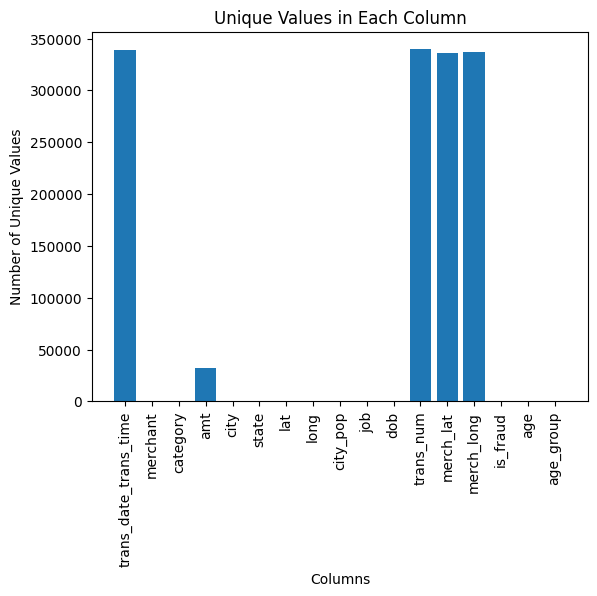

In [36]:
#visualize the unique value no. in each col.

unique_values = df_Azin.nunique()

plt.bar(unique_values.index, unique_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Unique Values in Each Column')
plt.xticks(rotation=90)

plt.show()

In [37]:
#drop cols which have high quantity of unique values
#merch_lat, Merch_long have a high quantity of unique values also they are almost giving the same info as lat and Long are giving.
columns_to_drop = ['trans_date_trans_time','merchant','trans_num','merch_lat','merch_long','city','job','dob','age']
df_Azin = df_Azin.drop(columns_to_drop, axis=1)

In [38]:
df_Azin.shape

(339607, 8)

In [39]:
df_Azin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   category   339607 non-null  object  
 1   amt        339607 non-null  float64 
 2   state      339607 non-null  object  
 3   lat        339607 non-null  float64 
 4   long       339607 non-null  float64 
 5   city_pop   339607 non-null  int64   
 6   is_fraud   339607 non-null  int64   
 7   age_group  339607 non-null  category
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 18.5+ MB


In [40]:
df_Azin

,category,amt,state,lat,long,city_pop,is_fraud,age_group
0,grocery_pos,107.23,WA,48.8878,-118.2105,149,0,41-60
1,entertainment,220.11,ID,42.1808,-112.2620,4154,0,41-60
2,grocery_pos,96.29,CA,41.6125,-122.5258,589,0,61-80
3,shopping_pos,7.77,NM,32.9396,-105.8189,899,0,41-60
4,misc_pos,6.85,WY,43.0172,-111.0292,471,0,41-60
...,...,...,...,...,...,...,...,...
339602,home,12.68,AK,64.7556,-165.6723,145,0,81-100
339603,kids_pets,13.02,CA,41.5403,-122.9366,308,0,61-80
339604,health_fitness,43.77,MO,40.4931,-91.8912,519,0,41-60
339605,kids_pets,86.88,WA,46.1966,-118.9017,3684,0,41-60


In [41]:
# converting the 'category' column to numeric
df_Azin = pd.get_dummies(df_Azin, columns=['category'])


In [42]:
df_Azin = pd.get_dummies(df_Azin, columns=['state'])

In [43]:
df_Azin = pd.get_dummies(df_Azin, columns=['age_group'])

In [44]:
df_Azin

,amt,lat,long,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,state_NE,state_NM,state_OR,state_UT,state_WA,state_WY,age_group_21-40,age_group_41-60,age_group_61-80,age_group_81-100
0,107.23,48.8878,-118.2105,149,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,220.11,42.1808,-112.2620,4154,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,96.29,41.6125,-122.5258,589,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,7.77,32.9396,-105.8189,899,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,6.85,43.0172,-111.0292,471,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339602,12.68,64.7556,-165.6723,145,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
339603,13.02,41.5403,-122.9366,308,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
339604,43.77,40.4931,-91.8912,519,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
339605,86.88,46.1966,-118.9017,3684,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [45]:
df_Azin.describe()

,amt,lat,long,city_pop,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,state_NE,state_NM,state_OR,state_UT,state_WA,state_WY,age_group_21-40,age_group_41-60,age_group_61-80,age_group_81-100
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,...,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,0.005247,0.071324,0.067837,0.103322,0.033436,0.096382,...,0.101367,0.068983,0.077760,0.045220,0.079621,0.081789,0.338094,0.402827,0.179178,0.079901
std,161.675242,5.094961,12.651370,2.930299e+05,0.072248,0.257365,0.251467,0.304380,0.179772,0.295115,...,0.301815,0.253425,0.267795,0.207786,0.270707,0.274043,0.473061,0.490467,0.383502,0.271141
min,1.000000,20.027100,-165.672300,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
# for now I do not upsample the categories as they are not balance (Later will try with balanced category)

In [48]:
X = df_Azin.drop(columns=['is_fraud'])
y = df_Azin['is_fraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train.shape

(237724, 35)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237724 entries, 214787 to 121958
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      237724 non-null  float64
 1   lat                      237724 non-null  float64
 2   long                     237724 non-null  float64
 3   city_pop                 237724 non-null  int64  
 4   category_entertainment   237724 non-null  uint8  
 5   category_food_dining     237724 non-null  uint8  
 6   category_gas_transport   237724 non-null  uint8  
 7   category_grocery_net     237724 non-null  uint8  
 8   category_grocery_pos     237724 non-null  uint8  
 9   category_health_fitness  237724 non-null  uint8  
 10  category_home            237724 non-null  uint8  
 11  category_kids_pets       237724 non-null  uint8  
 12  category_misc_net        237724 non-null  uint8  
 13  category_misc_pos        237724 non-null  uint8  
 14 

In [51]:
y_train.shape

(237724,)

In [52]:
print(y_train.value_counts())

0    236486
1      1238
Name: is_fraud, dtype: int64


Balance the Target Class:
Once you have a standardized training set, you can then balance the classes within this set.
It's crucial to only balance the training data. The test data should reflect the true distribution of classes as found in the real-world scenario.

In [53]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [54]:
print(pd.Series(y_train_balanced).value_counts())


1    236486
0    236486
Name: is_fraud, dtype: int64


## Model Building & hypertuning & evaluation

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [57]:
# Create pipelines for each model
pipelines = {
    'lr': Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000))]),
    'rf': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    'gb': Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingClassifier())]),

}

In [58]:
# Hyperparameters to tune
hyperparameters = {
    'lr': {'lr__C': [0.1, 1, 10]},
    'rf': {'rf__n_estimators': [10, 50, 100], 'rf__max_depth': [None, 10, 20]},
    'gb': {'gb__n_estimators': [50, 100], 'gb__learning_rate': [0.01, 0.1]},

}

In [59]:
# Dictionary to store the best estimators
best_estimators = {}

# Perform Grid Search
for model_name in pipelines.keys():
    clf = GridSearchCV(pipelines[model_name], hyperparameters[model_name], cv=3)
    clf.fit(X_train_balanced, y_train_balanced)
    best_estimators[model_name] = clf.best_estimator_
    print(f"{model_name} best parameters: {clf.best_params_}")

lr best parameters: {'lr__C': 10}
rf best parameters: {'rf__max_depth': None, 'rf__n_estimators': 100}
gb best parameters: {'gb__learning_rate': 0.1, 'gb__n_estimators': 100}


Evaluation for lr:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    101339
           1       0.33      0.69      0.44       544

    accuracy                           0.99    101883
   macro avg       0.66      0.84      0.72    101883
weighted avg       0.99      0.99      0.99    101883

Accuracy: 0.9907148395708804


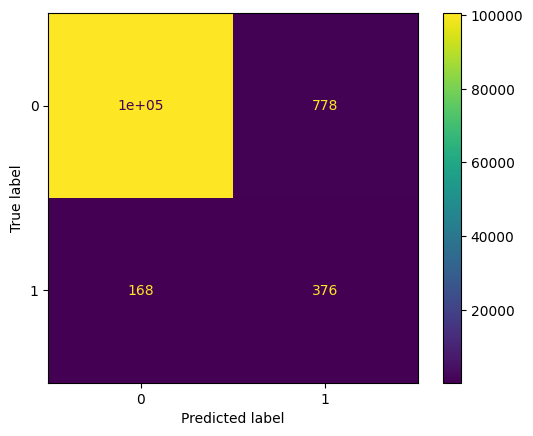



Evaluation for rf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101339
           1       0.64      0.60      0.62       544

    accuracy                           1.00    101883
   macro avg       0.82      0.80      0.81    101883
weighted avg       1.00      1.00      1.00    101883

Accuracy: 0.9960444823964744


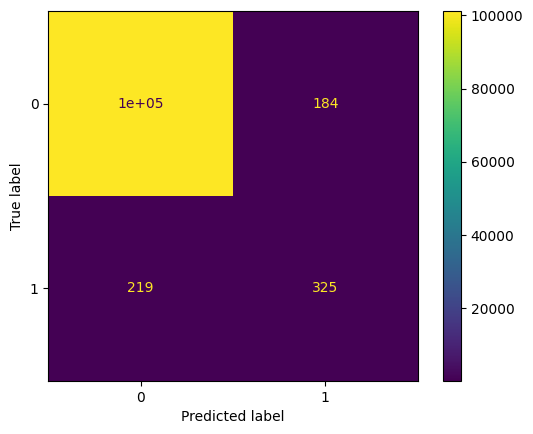



Evaluation for gb:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    101339
           1       0.22      0.83      0.35       544

    accuracy                           0.98    101883
   macro avg       0.61      0.91      0.67    101883
weighted avg       0.99      0.98      0.99    101883

Accuracy: 0.9833338240923413


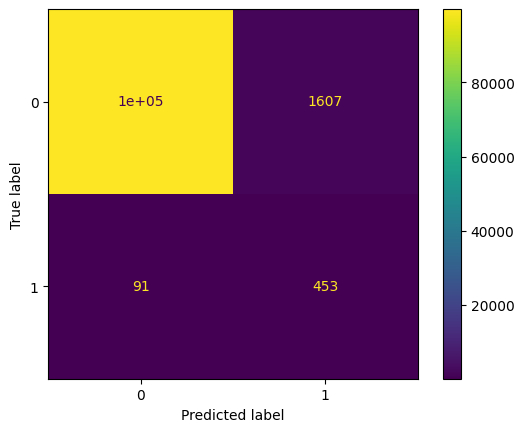

In [73]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluate on test set
for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)  # Assuming X_test is your test set features
    print(f"Evaluation for {model_name}:")
    print(classification_report(y_test, y_pred))  # Assuming y_test is your test set target
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print("\n")


Insights:

In this fraud detection, recall is typically more important. This is because in fraud detection, the cost of missing a fraudulent activity (a False Negative) is usually much higher than incorrectly flagging a normal activity as fraudulent (a False Positive).


If prioritizing the detection of as many fraudulent cases as possible (high recall), the Gradient Boosting model is preferable.
For a balance between identifying fraud and minimizing false positives, the Random Forest model appears to be more effective.
The Logistic Regression model, while having a good recall, might not be as efficient due to its lower precision and F1-score.